In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = keras.datasets.mnist
(X_train, Y_train), (X_dev, Y_dev) = dataset.load_data()
X_cv, X_test, Y_cv, Y_test = train_test_split(X_dev, Y_dev, test_size=0.5)

In [3]:
X_train = X_train / 255
X_cv = X_cv / 255
X_test = X_test / 255

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_cv = X_cv.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
k = 10
learning_rate = 0.001
dropout_rate = 0.5
epoch_num = 10

In [6]:
def get_model(k, learning_rate, dropout_rate):
    
    model = keras.Sequential([
        keras.layers.Conv2D(32, (5, 5), activation="relu"),
        keras.layers.MaxPool2D((2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPool2D((2, 2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(dropout_rate),

        keras.layers.Dense(k, activation="softmax")
    ])

    opt = keras.optimizers.Adam(learning_rate)
    loss_function = keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer=opt, 
                  loss=loss_function, 
                  metrics=["accuracy"])

    return model

In [7]:
def train_model(model, epoch_num):
    history = model.fit(X_train, Y_train, epochs=epoch_num, validation_data=(X_cv, Y_cv))

    plt.figure()
    plt.plot(history.history["loss"], label="Cost (training data)")
    plt.plot(history.history["val_loss"], label="Cost (validation data)")
    plt.ylabel("Cost Value")
    plt.xlabel("Epoch Number")
    plt.legend(loc="upper right")
    plt.show()

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1966 - accuracy: 0.9396 - val_loss: 0.0382 - val_accuracy: 0.9872
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0556 - accuracy: 0.9844 - val_loss: 0.0249 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0211 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0224 -

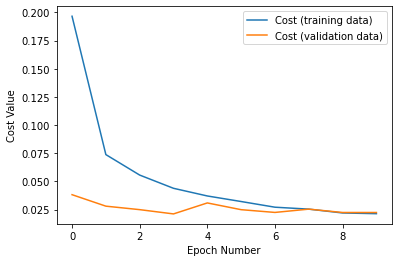

In [8]:
model = get_model(k, learning_rate, dropout_rate)
train_model(model, epoch_num)

In [9]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 8ms/step - loss: 0.0237 - accuracy: 0.9936


[0.023689046502113342, 0.9936000108718872]

In [10]:
model.save("saved_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/assets


In [15]:
model = keras.models.load_model("saved_model")

In [16]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.0237 - accuracy: 0.9936


[0.023689046502113342, 0.9936000108718872]

In [17]:
np.argmax(model.predict(np.expand_dims(X_test[234], axis = 0)))

2

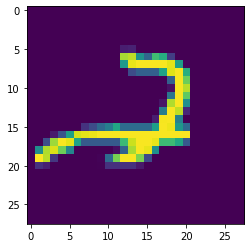

In [18]:
plt.imshow(np.reshape(X_test[234], (28, 28)))